In [1]:
!pip install tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot  as plt

ImportError: Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [2]:
from zipfile import ZipFile

# specifying the zip file name
file_name = "Dataset.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
EfficientNetB0-100-(224 X 224)- 98.40.h5       2023-05-03 19:32:12     76183400
sports.csv                                     2023-05-03 19:32:18       686576
test/air hockey/1.jpg                          2023-05-03 19:32:18        25590
test/air hockey/2.jpg                          2023-05-03 19:32:18        35288
test/air hockey/3.jpg                          2023-05-03 19:32:18        22849
test/air hockey/4.jpg                          2023-05-03 19:32:18        21627
test/air hockey/5.jpg                          2023-05-03 19:32:18        29575
test/ampute football/1.jpg                     2023-05-03 19:32:18        23906
test/ampute football/2.jpg                     2023-05-03 19:32:18        36448
test/ampute football/3.jpg                     2023-05-03 19:32:18        32197
test/ampute football/4.jpg                     2023-05-03 19:32:18        34973
test/ampute football/5.jpg              

In [3]:
# specify the train, validation, and test directories.
train_dir = 'train'
test_dir = 'test'
valid_dir = 'valid'

In [4]:
#import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)
valid_data_gen = ImageDataGenerator(rescale=1/255.)
train_data = train_data_gen.flow_from_directory(train_dir,
                                               target_size=(224,224)

                                              )

test_data = train_data_gen.flow_from_directory(test_dir,
                                              target_size=(224,224)
                                              )

valid_data = train_data_gen.flow_from_directory(valid_dir,
                                               target_size=(224,224)

                                              )

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [11]:
import tensorflow_hub as hub

In [7]:
from tensorflow.keras import regularizers


In [8]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [10]:
pip install tensorflow-hub

In [ ]:
import tensorflow as tf
import os

# Define paths to your dataset
train_dir = "train"  # Folder containing training images
valid_dir = "valid"  # Folder containing validation images

# Function to process images and labels
def process_image(file_path, label):
    # Read the image file
    img = tf.io.read_file(file_path)
    # Decode the image (supports JPEG, PNG, etc.)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    # Resize the image to the required size
    img = tf.image.resize(img, [224, 224])
    # Normalize pixel values to [0, 1]
    img = img / 255.0
    return img, label

# Function to load dataset from a directory
def load_dataset_from_directory(directory):
    # Get all file paths and labels
    file_paths = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assuming subfolders are named by class
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file_name)
                # Check if the file is a valid image format
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                    file_paths.append(file_path)
                    labels.append(label)
    return file_paths, labels, class_names

# Load training and validation datasets
train_file_paths, train_labels, class_names = load_dataset_from_directory(train_dir)
valid_file_paths, valid_labels, _ = load_dataset_from_directory(valid_dir)

# Convert labels to one-hot encoding
def one_hot_encode(label, num_classes):
    return tf.one_hot(label, num_classes)

# Create TensorFlow datasets for training and validation
train_data = tf.data.Dataset.from_tensor_slices((train_file_paths, train_labels))
train_data = train_data.map(lambda x, y: (process_image(x, one_hot_encode(y, num_classes=len(class_names)))))
train_data = train_data.batch(32).shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

valid_data = tf.data.Dataset.from_tensor_slices((valid_file_paths, valid_labels))
valid_data = valid_data.map(lambda x, y: (process_image(x, one_hot_encode(y, num_classes=len(class_names)))))
valid_data = valid_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Define a lightweight CNN model
model_1 = tf.keras.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3), name='conv_block_1'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pool_1'),

    # Second convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv_block_2'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pool_2'),

    # Flatten the feature maps
    tf.keras.layers.Flatten(name='flatten_layer'),

    # Fully connected dense layer
    tf.keras.layers.Dense(128, activation='relu', name='dense_layer_1'),

    # Output layer for the number of classes
    tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')  # Softmax for multiclass classification
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Print the model summary
model_1.summary()

# Fit the model
Inception_history = model_1.fit(
    train_data,
    epochs=20,
    validation_data=valid_data
)

c:\Users\jashu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_block_1 (Conv2D)           │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling2D)       │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block_2 (Conv2D)           │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_2 (MaxPooling2D)       │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_layer (Flatten)         │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_1 (Dense)           │ (None, 128)            │    11,944,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,962,052 (45.63 MB)

 Trainable params: 11,962,052 (45.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


<Axes: >

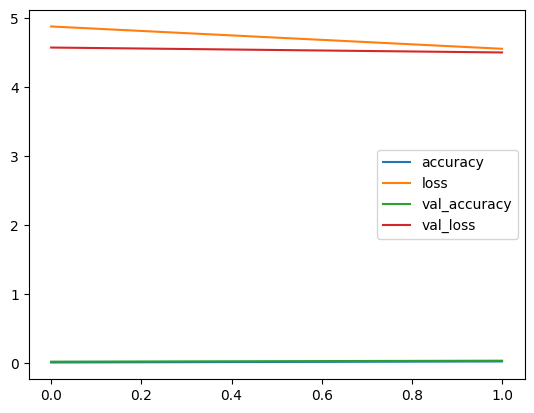

In [3]:
pd.DataFrame(Inception_history.history).plot()

In [9]:
#now let's evaluate the model.
model_1.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - accuracy: 0.0276 - loss: 4.5062


[4.508988857269287, 0.02800000086426735]

In [10]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [20]:
import numpy as np

import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['air hockey' 'ampute football' 'archery' 'arm wrestling' 'axe throwing'
 'balance beam' 'barell racing' 'baseball' 'basketball' 'baton twirling'
 'bike polo' 'billiards' 'bmx' 'bobsled' 'bowling' 'boxing' 'bull riding'
 'bungee jumping' 'canoe slamon' 'cheerleading' 'chuckwagon racing'
 'cricket' 'croquet' 'curling' 'disc golf' 'fencing' 'field hockey'
 'figure skating men' 'figure skating pairs' 'figure skating women'
 'fly fishing' 'football' 'formula 1 racing' 'frisbee' 'gaga'
 'giant slalom' 'golf' 'hammer throw' 'hang gliding' 'harness racing'
 'high jump' 'hockey' 'horse jumping' 'horse racing' 'horseshoe pitching'
 'hurdles' 'hydroplane racing' 'ice climbing' 'ice yachting' 'jai alai'
 'javelin' 'jousting' 'judo' 'lacrosse' 'log rolling' 'luge'
 'motorcycle racing' 'mushing' 'nascar racing' 'olympic wrestling'
 'parallel bar' 'pole climbing' 'pole dancing' 'pole vault' 'polo'
 'pommel horse' 'rings' 'rock climbing' 'roller derby'
 'rollerblade racing' 'rowing' 'rugby' 'sailboat

In [21]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


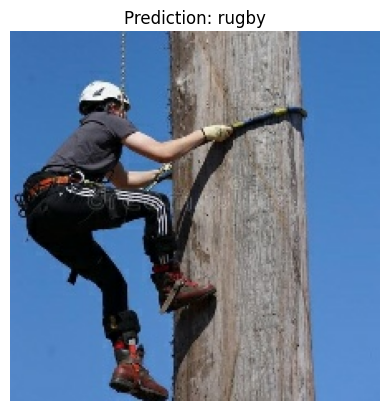

In [25]:
# Provide the correct path to your custom image
custom_image_path = "/content/train/pole climbing/001.jpg"

# Call the function
pred_and_plot(model_1, custom_image_path, class_names)